# Imports

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
from PIL import Image, ImageOps

DATADIR = "/Users/Alberto/Desktop/Building_Segmentation/train"  #path to folder with images
directory = '/Users/Alberto/Desktop/Building_Segmentation/train/' #path to write images in folder

# Image Transformations

## Rename Images

In [12]:
def main(): 
  
    for count, filename in enumerate(os.listdir(DATADIR)): 
        dst ="IMG" + str(count) + ".jpg"
        src = directory+ filename 
        dst = directory + dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst)

In [4]:
if __name__ == '__main__': 
      
    # Calling main() function 
    main()

## Resizing Images

## Adding borders 

Note: It will throw a "[Errno 13] Permission denied: path" due to the changes in the directory from a web server(Jupyter Notebook). Change ownership of directory to avoid error. 

In [112]:
desired_size = 1536
count= 0;
newdir = '/Users/Alberto/Desktop/Building_Segmentation/train/normal/'
for filename in os.listdir(directory):
    im_pth = DATADIR + "/"+ filename

    im = Image.open(im_pth)
    old_size = im.size  # old_size[0] is in (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # use thumbnail() or resize() method to resize the input image

    # thumbnail is a in-place operation

    # im.thumbnail(new_size, Image.ANTIALIAS)

    im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it

    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))
    new_im.save(newdir + filename, 'jpeg')
    count= count + 1

PermissionError: [Errno 13] Permission denied: '/Users/Alberto/Desktop/Building_Segmentation/train/normal'

New format demo:

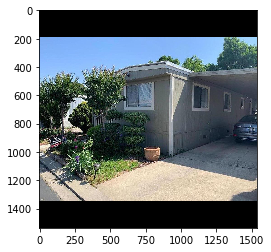

In [114]:
plt.imshow(new_im)
plt.show()

## Changing proportion

In [82]:
for filename in os.listdir(directory):
    image = Image.open(directory + '/' + filename)
    new_image = image.resize((250, 250))
    new_image.save('/Users/Alberto/Desktop/REU/BuildingDastasets/Building Segmentation/train256x256/' + filename)

# Extras 

## Gray and resizing 

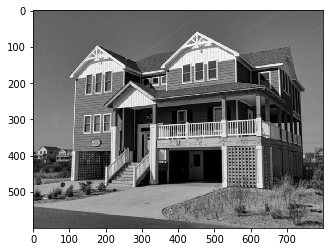

In [3]:
path = os.path.join(DATADIR)
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = "gray")
    plt.show()
    break

In [4]:
print(img_array.shape)

(600, 800)


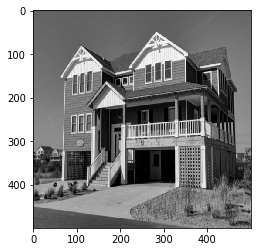

In [5]:
IMG_SIZE = 500

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        except Exception as e:
            pass